# How to plot trees of hierarchical peaks
Hierarchical peaks have a binary tree structure.

It can be visualized by plotting the PeakTree as a tree vis-à-vis the peaky data.

In [1]:
import random
from itertools import accumulate

import matplotlib
import matplotlib.pyplot as plt

import hierarchical_peaks as hip

%matplotlib inline
plt.style.use('seaborn')

A random walk is a great way to generate data containing hierarchical peaks:

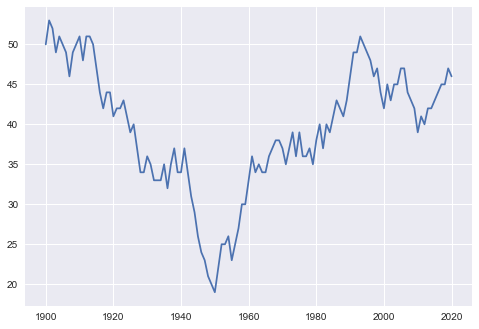

In [2]:
# Create a synthetic data set:

random.seed(a="It's...")
x, y = zip(*enumerate(accumulate((random.randint(-3, 3) for n in range(120)), initial=50), start=1900))

# and a quick plot:

plt.plot(x, y);

In [3]:
# Create a PeakTree for the data set:

t1 = hip.PeakTree(hip.filter_local_extrema(enumerate(y)))

# and a quick view:

print(t1)

# Notation: <high> /& <low>/ => <parent>
1 /& 4/ => 3 /& 11/ => 7 /& 19/ => 17 /& 23/ => 20 /& 26/ => 25 /& 30/ => 29 /& 35/ => 34 /& 40/ => 36 /& 55/ => 50
93 /& 98/ => 97 /& 102/ => 100 /& 86/ => 88 /& 83/ => 84 /& 112/ => 110 /& 81/ => 82 /& 71/ => 79 /& 62/ => 65 /& 54/ => 55
61 /& 63/ => 62
75 /& 73/ => 74 /& 78/ => 77 /& 69/ => 71
119 /& 111/ => 112
106 /& 101/ => 102
41 /& 38/ => 40
13 /& 10/ => 11



The PeakTree methods `.low_descendants` and `.high_descendants` let us iterate over low child nodes and high child nodes separately. Each high child node is the child of its only parent node. And each low child node is the low child of its only parent node. So if `i` is the parent, `j` is the high and `k` the low child, then `j = t1.high(i)`, `k = t1.low(i)` and `i = t1.parent(j) = t1.parent(k)`.

We can therefore plot arrows to fathers and mothers in different colors.

In [4]:
# hide away some plotting details:
def add_L_arrow(axes, tail_x, tail_y, head_x, head_y, color):
    axes.add_patch(matplotlib.patches.FancyArrowPatch(
                                (tail_x, tail_y),
                                (head_x, tail_y),
                                arrowstyle='-',
                                shrinkA=2, shrinkB=0,
                                lw=1,
                                color=color)
                  )
    axes.add_patch(matplotlib.patches.FancyArrowPatch(
                                (head_x, tail_y),
                                (head_x, head_y),
                                arrowstyle='->,head_length=2, head_width=1.5',
                                shrinkA=0, shrinkB=1,
                                lw=1.5,
                                color=color)
                  )

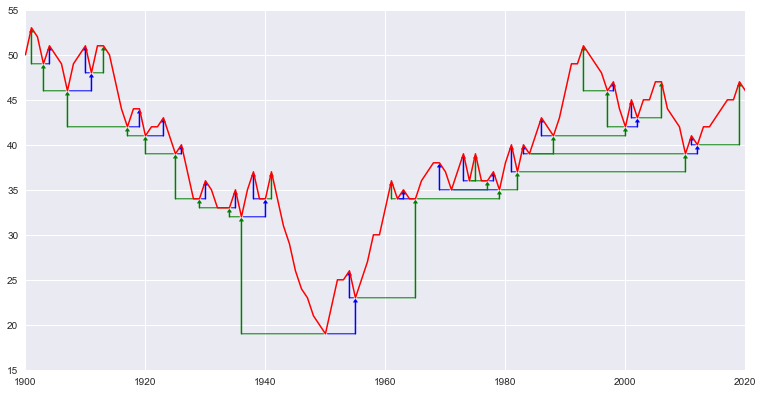

In [5]:
# make a plot:
fig = plt.figure(figsize=(10.0, 5.0))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlim([1900,2020])
ax.set_ylim([15, 55])


# iterate over low child nodes:
for k in t1.low_descendants():
    i = t1.parent(k)
    # plot blue arrow from i to k:
    add_L_arrow(ax, x[i], y[i], x[k], y[k], "blue")
    
# iterate over high child nodes:
for j in t1.high_descendants():
    i = t1.parent(j)
    # plot green arrow from i to j:
    add_L_arrow(ax, x[i], y[i], x[j], y[j], "green")


ax.plot(x,y, lw=1.5, c="red");

So, that's how to plot a PeakTree!

But we shall see other ways to do it.

## How to plot a subtree
By giving an optional argument to `low_descendants` and `high_descendants`, their output can be restricted to a subtree rather than the whole tree. The `localroot` is the peak node at the root of the subtree we want to plot.

For example, we can choose the peak node at `x = 2000`. It has index `i = 100`, so we use `localroot = 100` as argument:

In [6]:
# test:
x[100]

2000

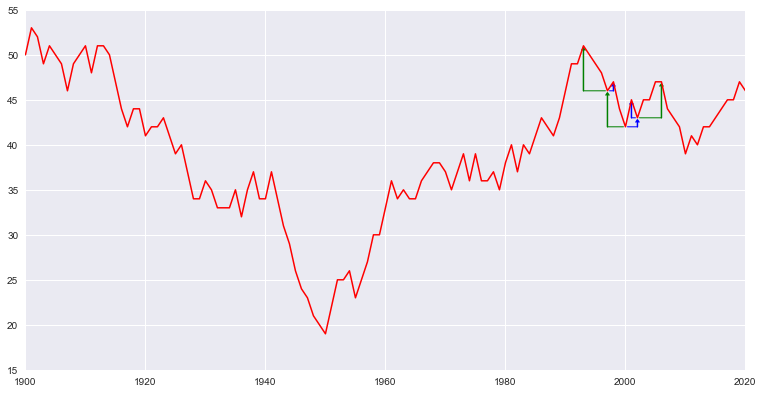

In [7]:
# make a subtree plot:
fig = plt.figure(figsize=(10.0, 5.0))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlim([1900,2020])
ax.set_ylim([15, 55])


# iterate over low child nodes:
for k in t1.low_descendants(localroot=100):
    i = t1.parent(k)
    # plot blue arrow from i to k:
    add_L_arrow(ax, x[i], y[i], x[k], y[k], "blue")
    
# iterate over high child nodes:
for j in t1.high_descendants(localroot=100):
    i = t1.parent(j)
    # plot green arrow from i to j:
    add_L_arrow(ax, x[i], y[i], x[j], y[j], "green")

    
ax.plot(x,y, lw=1.5, c="red");

The subtree can also be printed as a string:

In [8]:
localroot = 100
print(t1.as_string(localroot))

# Notation: <high> /& <low>/ => <parent>
93 /& 98/ => 97 /& 102/ => 100
106 /& 101/ => 102



## Another way
In the figures above, the necessary coordinates for plotting the tree were retrieved from the data set `x, y`. This could be called a 'data-centric' way of plotting, as opposed to an object-centric way:
- **Data-centric plotting with "indexed" peaks.**
With sequential data, such as our two lists `x` and `y`, we can use the data set to provide the coordinates for plotting: `(x[i], y[i])` are the coordinates of point `i`. If a PeakTree is initialized with `enumerate(y)`, then it will identify each peak by its index `i`. But the PeakTree will contain no information about the x-coordinates.
- **Object-centric plotting with "positioned" peaks.**
We can instead let a PeakTree instance provide the coordinates for plotting, without calling back to the original data set. The PeakTree must then be initialized to contain the x-positions as well.

Small changes in the data-centric code above can make it object-centric instead:

In [9]:
# Create a PeakTree with "positioned" peaks:

xy_pairs = zip(x, y)

t2 = hip.PeakTree(hip.filter_local_extrema(zip(xy_pairs, y)))

# and a quick view:

print(t2)

# Notation: <high> /& <low>/ => <parent>
(1901, 53) /& (1904, 51)/ => (1903, 49) /& (1911, 48)/ => (1907, 46) /& (1919, 44)/ => (1917, 42) /& (1923, 43)/ => (1920, 41) /& (1926, 40)/ => (1925, 39) /& (1930, 36)/ => (1929, 34) /& (1935, 35)/ => (1934, 33) /& (1940, 34)/ => (1936, 32) /& (1955, 23)/ => (1950, 19)
(1993, 51) /& (1998, 47)/ => (1997, 46) /& (2002, 43)/ => (2000, 42) /& (1986, 43)/ => (1988, 41) /& (1983, 40)/ => (1984, 39) /& (2012, 40)/ => (2010, 39) /& (1981, 40)/ => (1982, 37) /& (1971, 35)/ => (1979, 35) /& (1962, 34)/ => (1965, 34) /& (1954, 26)/ => (1955, 23)
(1961, 36) /& (1963, 35)/ => (1962, 34)
(1975, 39) /& (1973, 39)/ => (1974, 36) /& (1978, 37)/ => (1977, 36) /& (1969, 38)/ => (1971, 35)
(2019, 47) /& (2011, 41)/ => (2012, 40)
(2006, 47) /& (2001, 45)/ => (2002, 43)
(1941, 37) /& (1938, 37)/ => (1940, 34)
(1913, 51) /& (1910, 51)/ => (1911, 48)



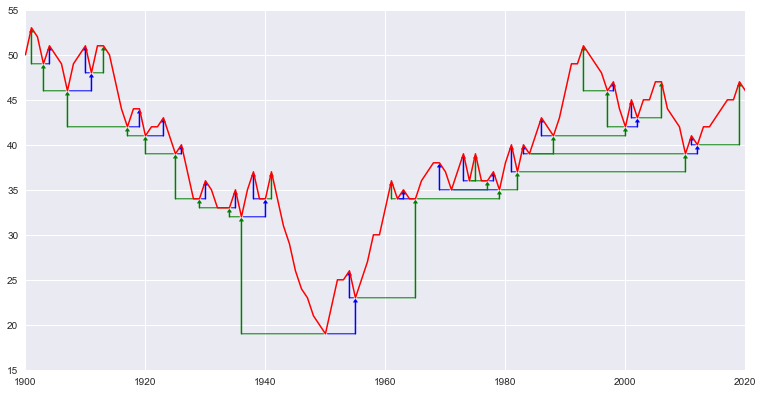

In [10]:
# make a new plot:
fig = plt.figure(figsize=(10.0, 5.0))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlim([1900,2020])
ax.set_ylim([15, 55])


# iterate over low child nodes:
for k in t2.low_descendants():
    i = t2.parent(k)
    # plot blue arrow from i to k:
    add_L_arrow(ax, *i, *k, "blue")

# iterate over high child nodes:
for j in t2.high_descendants():
    i = t2.parent(j)
    # plot green arrow from i to j:
    add_L_arrow(ax, *i, *j, "green")


ax.plot(x,y, lw=1.5, c="red");

Which is the same plot as before.

In [11]:
# We can also print the same subtree as before:

localroot = (2000, 42)
print(t2.as_string(localroot))

# Notation: <high> /& <low>/ => <parent>
(1993, 51) /& (1998, 47)/ => (1997, 46) /& (2002, 43)/ => (2000, 42)
(2006, 47) /& (2001, 45)/ => (2002, 43)



As a last example, we can initialize a PeakTree with `zip(x, y)` instead. Then it will identify each peak by its position `x` only. The PeakTree's `.data`-dict can be used to provide the `y`-values when plotting:


In [12]:
# Create a PeakTree with "positioned" peaks:

t3 = hip.PeakTree(hip.filter_local_extrema(zip(x, y)))

# and a quick view:

print(t3)

# Notation: <high> /& <low>/ => <parent>
1901 /& 1904/ => 1903 /& 1911/ => 1907 /& 1919/ => 1917 /& 1923/ => 1920 /& 1926/ => 1925 /& 1930/ => 1929 /& 1935/ => 1934 /& 1940/ => 1936 /& 1955/ => 1950
1993 /& 1998/ => 1997 /& 2002/ => 2000 /& 1986/ => 1988 /& 1983/ => 1984 /& 2012/ => 2010 /& 1981/ => 1982 /& 1971/ => 1979 /& 1962/ => 1965 /& 1954/ => 1955
1961 /& 1963/ => 1962
1975 /& 1973/ => 1974 /& 1978/ => 1977 /& 1969/ => 1971
2019 /& 2011/ => 2012
2006 /& 2001/ => 2002
1941 /& 1938/ => 1940
1913 /& 1910/ => 1911



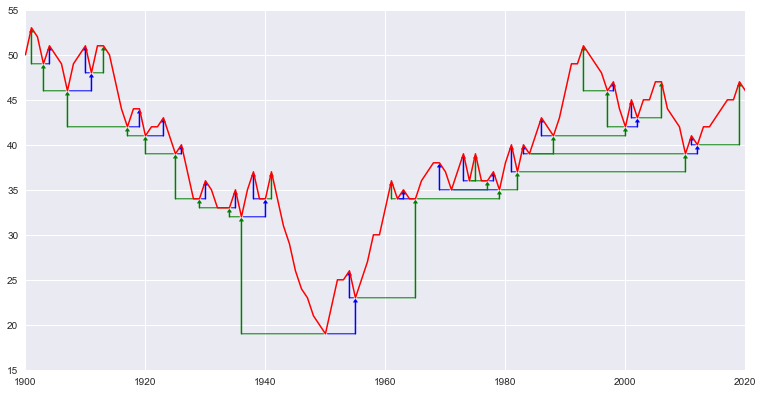

In [13]:
# make a new plot:
fig = plt.figure(figsize=(10.0, 5.0))
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlim([1900,2020])
ax.set_ylim([15, 55])


# iterate over low child nodes:
for xk in t3.low_descendants():
    xi = t3.parent(xk)
    # plot blue arrow from xi to xk:
    add_L_arrow(ax, xi, t3.data[xi], xk, t3.data[xk], "blue")

# iterate over high child nodes:
for xj in t3.high_descendants():
    xi = t3.parent(xj)
    # plot green arrow from xi to xj:
    add_L_arrow(ax, xi, t3.data[xi], xj, t3.data[xj], "green")


ax.plot(x,y, lw=1.5, c="red");